In [12]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [13]:
#Define any constants used
kB = 1.38 * 10**(-23)

In [14]:
#Choose a temperature
T = 50 #K

In [15]:
#define inverse cumulative distribution function (icdf) for boltzmann dist
# p(E) = e^(-E/kT)/'Z1
#'Z1 is kT
def icdf(u):
    return -sp.log(1-u)

In [16]:
#Generates a number, n, of random energies based on above icdf
def rand_E(n):
    return icdf(sp.stats.uniform.rvs(size=n))

In [35]:
#Defining initial conditions and parameters for harmonic oscillator system
E_0 = rand_E(1) #random energy generated from boltzmann dist
print(E_0)
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_0/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_0/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_0/k0)**(1/2), (2*E_0/m)**(1/2))
print(u0)

[ 0.34193198]
[ 3.69828058] [ 0.5847495]
[-0.6871538  -0.57456721]


In [36]:
def k(t):
    k = k0 + .5*t
    return k

In [37]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [38]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
tf = 20
tn = 2001
dt = tf/(tn-1)
t = sp.linspace(0,tf,tn)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


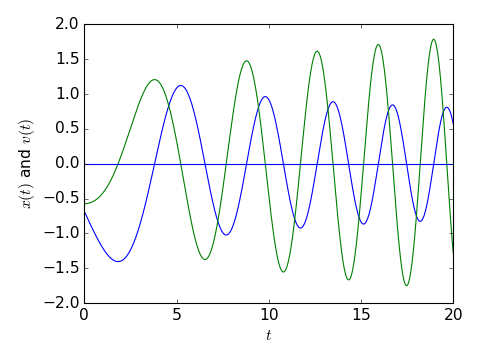

In [39]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [39]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[2.0158964498261938e-10, 3.3486597199677496e-11]


In [40]:
#Calculating energy at each time step
for i in range (0,tn):
    Energy = 1/2*m*v[i]**2 + 1/2*k(i+dt)*x[i]**2
    print(Energy)

0.343112432815
0.463149424724
0.587162230687
0.715197841864
0.847302835052
0.983523385646
1.12390538668
1.26849431095
1.41733521135
1.57047272092
1.72795102791
1.88981385707
2.05610445508
2.22686557391
2.40213945071
2.58196778496
2.76639173355
2.95545188308
3.14918822347
3.34764013211
3.55084636727
3.75884505314
3.97167363968
4.18936889177
4.41196687008
4.63950291241
4.87201161096
5.10952679274
5.35208149883
5.59970796977
5.85243761516
6.11030099892
6.3733278166
6.64154687963
6.91498608837
7.19367241022
7.47763185994
7.76688947823
8.06146931026
8.36139438407
8.6666866889
8.97736715477
9.29345563951
9.61497089404
9.94193054344
10.2743510667
10.612247775
10.95563479
11.3045250221
11.6589301485
12.0188605915
12.3843254963
12.7553327104
13.131888761
13.5139988339
13.9016667512
14.2948949504
14.6936844628
15.0980348914
15.5079443959
15.9234096731
16.3444259236
16.7709868368
17.2030845707
17.6407097306
18.0838513493
18.5324968665
18.9866321084
19.4462412811
19.9113069435
20.3818099759
20.857